# **Exploratory Data Analysis - TikTok**

<hr style="height: 3px; border:none; color:#000; background-color:#000;" />

This notebook presents an in-depth exploratory data analysis (EDA) of a TikTok dataset. The primary objective is to uncover patterns and insights from the data while establishing a comprehensive understanding of its structure and characteristics. The analysis is divided into structured sections, beginning with an overview of the dataset and progressing through statistical and graphical techniques to highlight key observations. By examining this data, we aim to provide actionable insights relevant to TikTok's content

In [1]:
# Libraries
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Description and Structure of the Dataset**

This section provides an overview of the dataset, focusing on its composition and organization. The objective is to understand the dataset's basic structure and key elements, setting the stage for more detailed analyses in subsequent sections

In [2]:
df_tiktok = pd.read_csv("Datasets/tiktok_dataset.csv")
df_tiktok.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [3]:
# Get the shape of the data
print(f'Shape of the data (rows, columns): {df_tiktok.shape}')
print()
df_tiktok.info()

Shape of the data (rows, columns): (19382, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [4]:
# Generate a table of descriptive statistics
df_tiktok.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


## **2. Check for Duplicates and Missing Values**

This section examines the dataset for duplicate entries and missing values, as these issues can significantly impact the quality of the analysis

In [5]:
# Check for duplicates
print(f'Number of duplicates: {df_tiktok.duplicated().sum()}')


Number of duplicates: 0


In [6]:
# Check for missing values
df_tiktok.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [7]:
# evaluate the missing values
df_tiktok[df_tiktok.isna().any(axis=1)].sample(n=30, random_state=42)


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19243,19244,NaN,8748632057,52,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19348,19349,NaN,7243880062,51,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19338,19339,NaN,6290893181,33,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19093,19094,NaN,3165543455,51,NaN,verified,active,NaN,NaN,NaN,NaN,NaN
19161,19162,NaN,9414969518,21,NaN,verified,active,NaN,NaN,NaN,NaN,NaN
19318,19319,NaN,1550251267,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19177,19178,NaN,5904893750,19,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19193,19194,NaN,9903418866,53,NaN,verified,active,NaN,NaN,NaN,NaN,NaN
19089,19090,NaN,1294150914,16,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19256,19257,NaN,1283908308,15,NaN,verified,active,NaN,NaN,NaN,NaN,NaN


In [8]:
# Calculate Percentage of Rows with NaN Values
rows_with_nan = df_tiktok[df_tiktok.isna().any(axis=1)]
percentage_nan = (len(rows_with_nan) / len(df_tiktok)) * 100
print(f"Number of rows with NaN values: {len(rows_with_nan)}")
print(f"Percentage of rows with NaN values: {percentage_nan:.2f}%")


Number of rows with NaN values: 298
Percentage of rows with NaN values: 1.54%


**Conclusion:** The dataset contains a low percentage of missing values (1.54%), which primarily occur in key variables such as video_view_count, video_like_count, and others. These variables contain NaN values in specific rows. Since these rows do not provide meaningful information for analysis, removing them does not introduce bias, as the missing data does not reflect any underlying pattern or group that could influence the results. Therefore, the decision to drop these rows is justified and ensures the dataset remains clean and ready for further analysis.

In [9]:
df2_tiktok = df_tiktok.dropna(axis=0)
df2_tiktok.isna().sum()



#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [10]:
# Outlier Detection Function
def num_outliers(data, column, strictly_positive=False):
    """
    Print the number of outliers in a specific column using IQR.
    Parameters:
    - data: DataFrame containing the data
    - column: The column (variable) name to analyze
    - strictly_positive: If True, restrict the lower bound to 0 (only positive values).
    """

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = max(0, q1 - 1.5 * iqr) if strictly_positive else q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Outlier count considering the lower bound
    outlier_count = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    median = data[column].median()

    # Print analysis
    print(f"Outlier Analysis for '{column}' using the IQR Method:")
    print("-" * 65)
    print(f"-> Median of '{column}': {median}")
    print(f"-> Lower bound: {lower_bound:.2f}")
    print(f"-> Upper bound: {upper_bound:.2f}")
    print(f"-> Number of outliers in '{column}': {outlier_count}")



## **3. Distribution and Outlier Analysis**

In this section, the focus is on analyzing the distribution of continuous variables and identifying potential outliers. By utilizing visual tools such as histograms and boxplots, patterns and anomalies within the data are explored. This analysis provides insights into the spread, central tendency, and variability of the data, which are important for understanding underlying trends.

### **Analize "video_comment_count" variable**

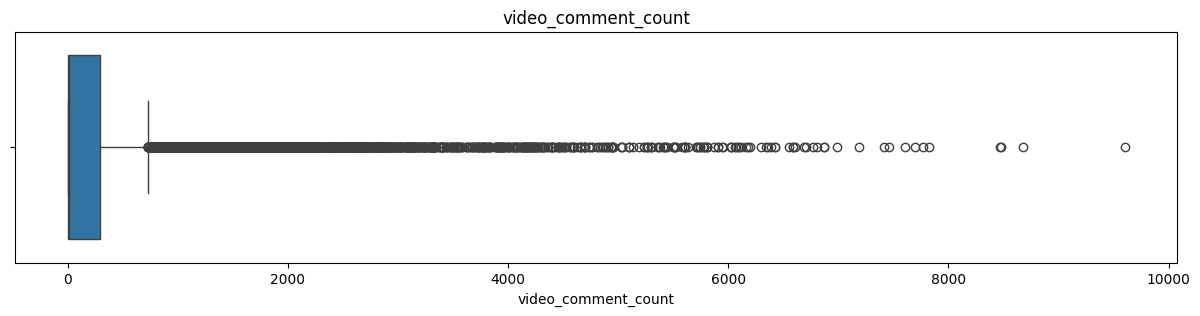

In [11]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(15,3))
plt.title('video_comment_count')
sns.boxplot(x=df2_tiktok['video_comment_count']);

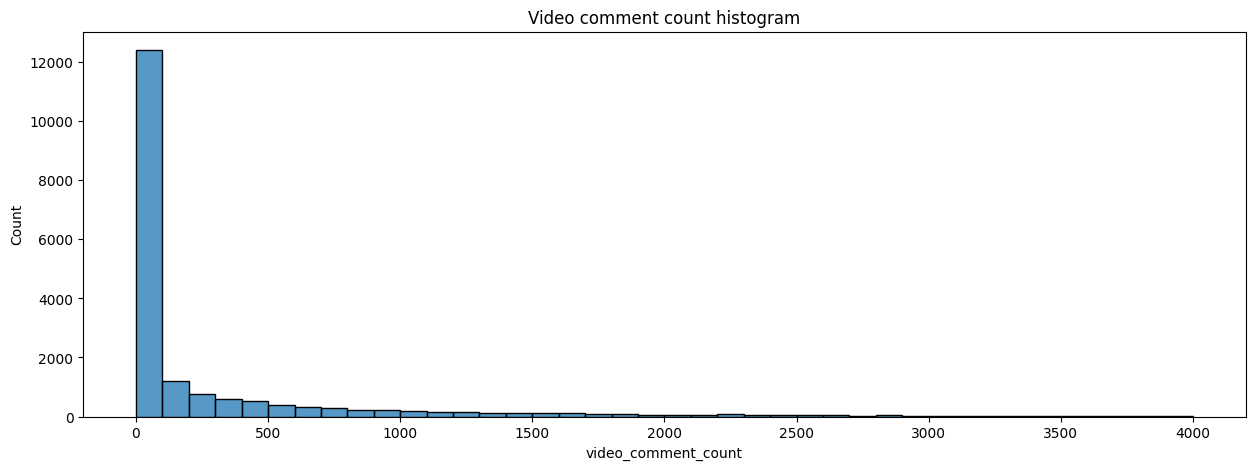

In [12]:
plt.figure(figsize=(15,5))
sns.histplot(df2_tiktok['video_comment_count'], bins=range(0,(4001),100))
plt.title('Video comment count histogram');

In [13]:
num_outliers(df2_tiktok,"video_comment_count",strictly_positive=True)

Outlier Analysis for 'video_comment_count' using the IQR Method:
-----------------------------------------------------------------
-> Median of 'video_comment_count': 9.0
-> Lower bound: 0.00
-> Upper bound: 728.50
-> Number of outliers in 'video_comment_count': 2789


**Conclusions:**
- Distribution: The variable is highly right-skewed
- Outliers: A total of 2789 outliers were identified, exceeding the upper bound and representing videos with an exceptionally high number of comments.
- The outliers are relevant to the analysis and may indicate videos of high popularity.

### **Analize "video_view_count" variable**

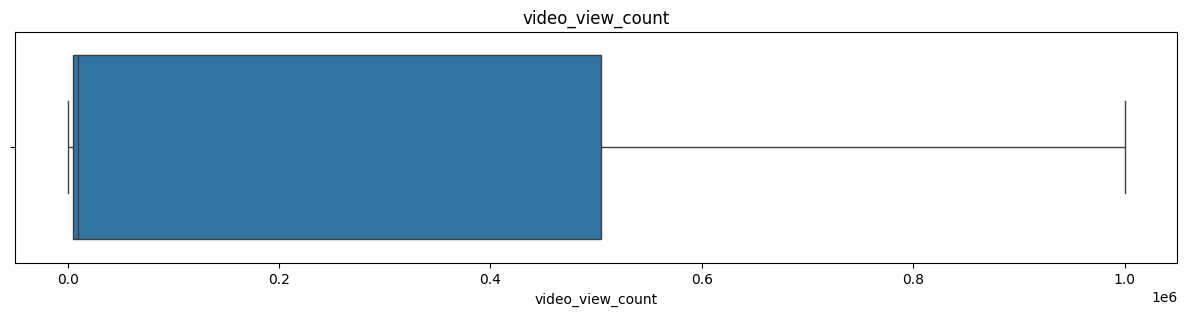

In [14]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(15,3))
plt.title('video_view_count')
sns.boxplot(x=df2_tiktok['video_view_count']);

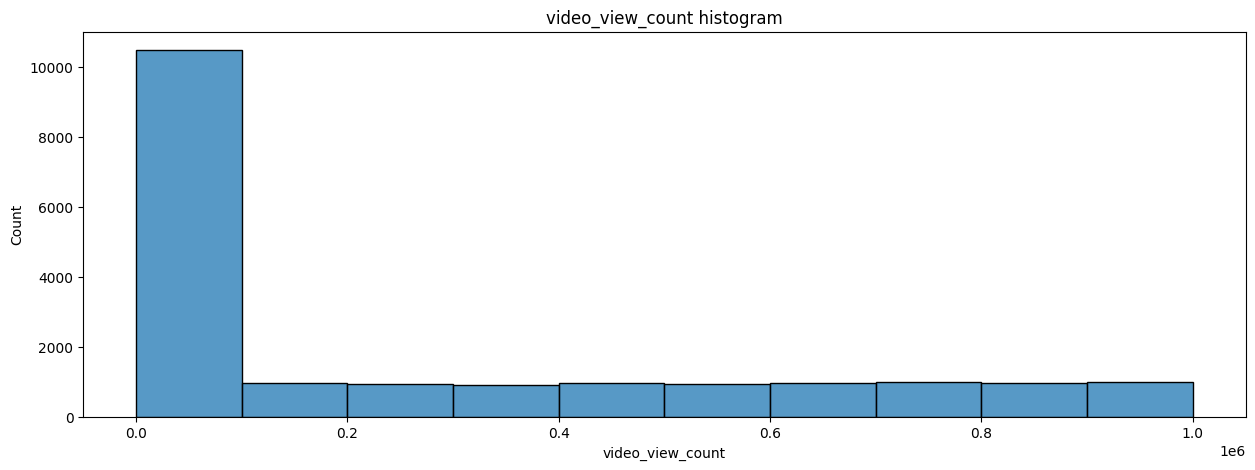

In [15]:
plt.figure(figsize=(15,5))
sns.histplot(df2_tiktok['video_view_count'], bins=range(0,(1+10**6),10**5))
plt.title('video_view_count histogram');

In [16]:
num_outliers(df2_tiktok,"video_view_count",strictly_positive=True)

Outlier Analysis for 'video_view_count' using the IQR Method:
-----------------------------------------------------------------
-> Median of 'video_view_count': 9954.5
-> Lower bound: 0.00
-> Upper bound: 1253403.75
-> Number of outliers in 'video_view_count': 0


**Conclusions:**
- Distribution: The variable video_view_count is highly right-skewed
- Outliers:  Based on the IQR method, there are no outliers identified in video_view_count, as all values fall within the calculated upper bound of 1,253,403.75.
- While there are no outliers, the data shows a long tail towards higher values, indicating the presence of videos with a significantly larger number of views compared to the majority. These high values might correspond to videos of notable popularity.

### **Analize "video_like_count" variable**

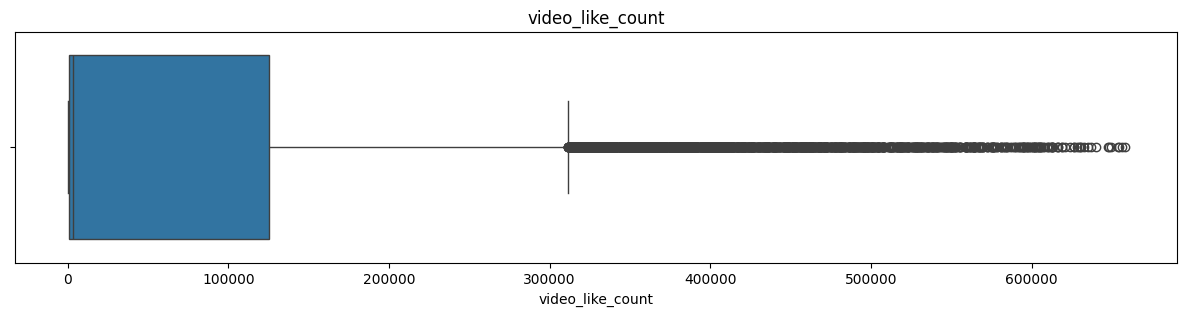

In [17]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(15,3))
plt.title('video_like_count')
sns.boxplot(x=df2_tiktok['video_like_count']);

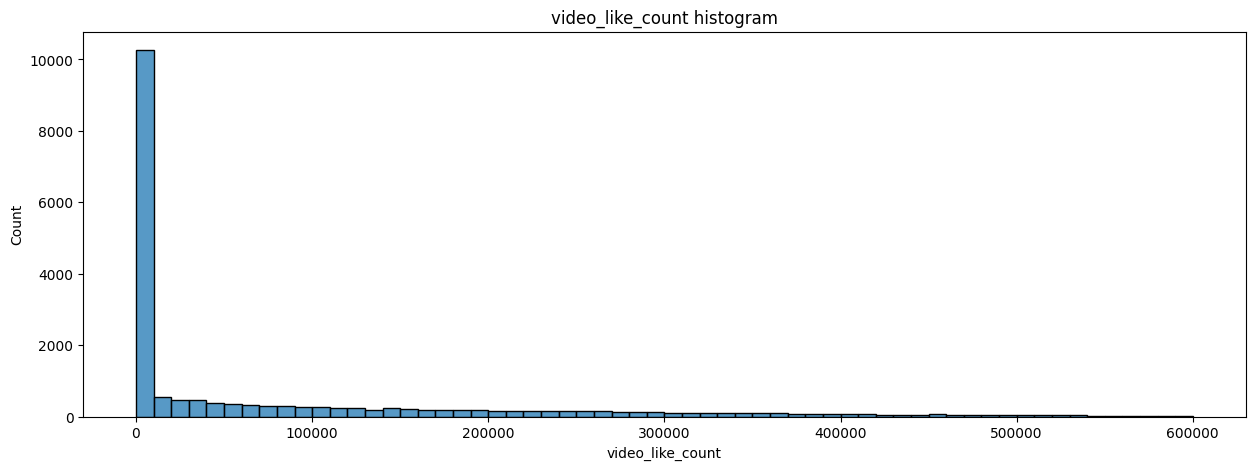

In [18]:
plt.figure(figsize=(15,5))
sns.histplot(df2_tiktok['video_like_count'], bins=range(0,(600001),10000))
plt.title('video_like_count histogram');

In [19]:
num_outliers(df2_tiktok,"video_like_count",strictly_positive=True)

Outlier Analysis for 'video_like_count' using the IQR Method:
-----------------------------------------------------------------
-> Median of 'video_like_count': 3403.5
-> Lower bound: 0.00
-> Upper bound: 311333.88
-> Number of outliers in 'video_like_count': 1726


**Conclusions:**
- Distribution: The variable video_like_count is highly right-skewed, with most values concentrated at the lower end of the scale. This is clearly observed in both the boxplot and histogram, where a majority of videos have relatively low like counts compared to the upper range.
- Outliers: Based on the IQR method, there are 1,726 outliers identified in video_like_count. These outliers exceed the calculated upper bound of 311,333.88 and represent videos with exceptionally high like counts.
- Insights: The presence of outliers indicates that a small subset of videos achieves significantly higher like counts, which could correspond to videos that went viral or gained exceptional popularity.

### **Analize "video_share_count" variable**

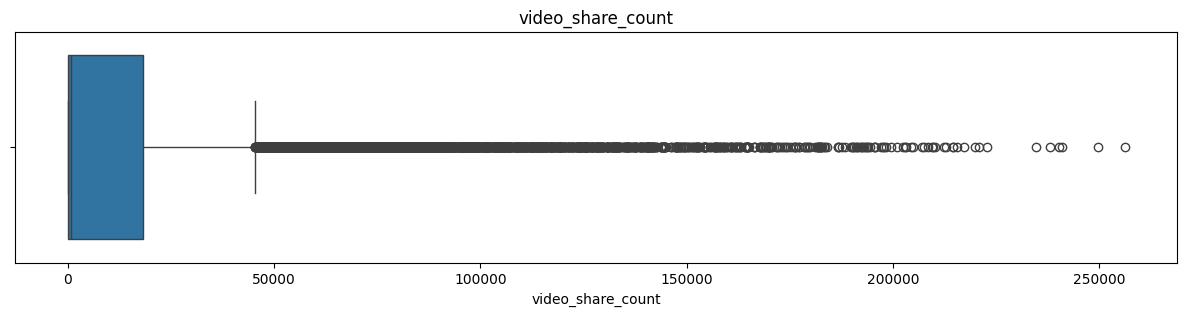

In [20]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(15,3))
plt.title('video_share_count')
sns.boxplot(x=df2_tiktok['video_share_count']);

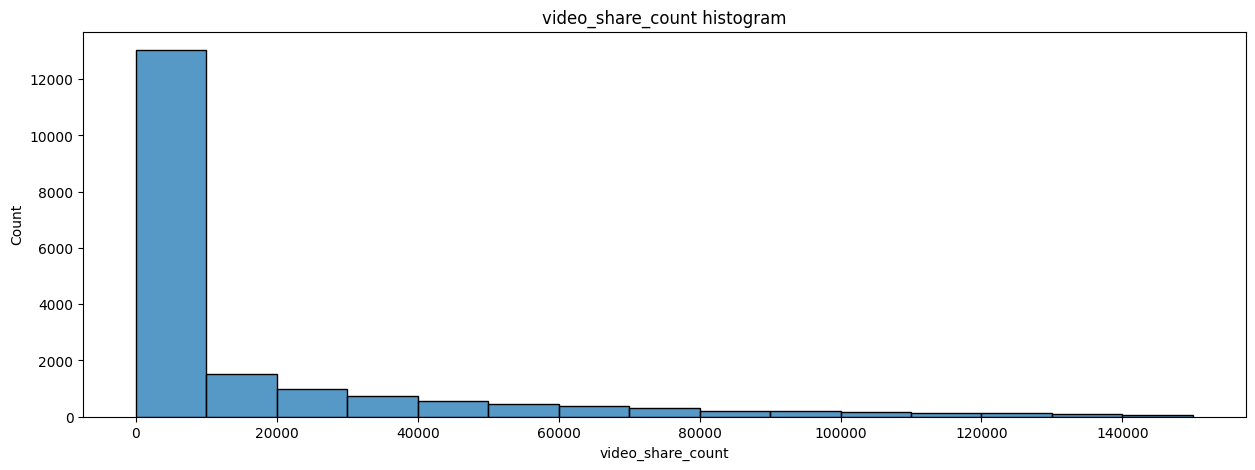

In [21]:
plt.figure(figsize=(15,5))
sns.histplot(df2_tiktok['video_share_count'], bins=range(0,(150001),10000))
plt.title('video_share_count histogram');

In [22]:
num_outliers(df2_tiktok,"video_share_count",strictly_positive=True)

Outlier Analysis for 'video_share_count' using the IQR Method:
-----------------------------------------------------------------
-> Median of 'video_share_count': 717.0
-> Lower bound: 0.00
-> Upper bound: 45382.50
-> Number of outliers in 'video_share_count': 2508


**Conclusions:**
- Distribution: The variable video_share_count is highly right-skewed, with the majority of values concentrated at the lower end of the scale. This is evident in both the boxplot and histogram, where most videos have a relatively small share count.
- Outliers: Based on the IQR method, there are 2,508 outliers identified in video_share_count. These outliers exceed the calculated upper bound of 45,382.50 and represent videos with exceptionally high share counts.
- Insights: The presence of a large number of outliers highlights that a small subset of videos is shared far more frequently than the rest. These videos likely exhibit viral characteristics or have content that resonates widely with audiences.

### **Analize "video_download_count" variable**

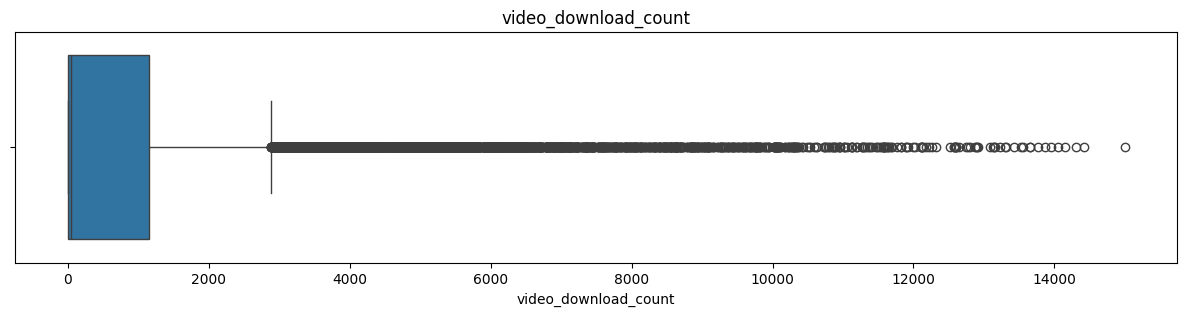

In [23]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(15,3))
plt.title('video_download_count')
sns.boxplot(x=df2_tiktok['video_download_count']);

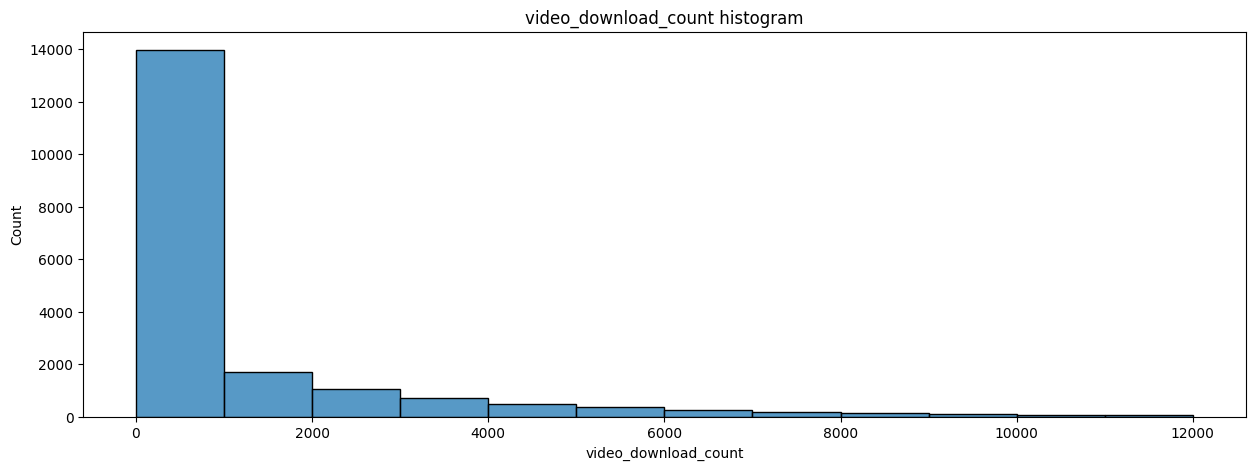

In [24]:
plt.figure(figsize=(15,5))
sns.histplot(df2_tiktok['video_download_count'], bins=range(0,(12001),1000))
plt.title('video_download_count histogram');

In [25]:
num_outliers(df2_tiktok,"video_download_count",strictly_positive=True)

Outlier Analysis for 'video_download_count' using the IQR Method:
-----------------------------------------------------------------
-> Median of 'video_download_count': 46.0
-> Lower bound: 0.00
-> Upper bound: 2880.12
-> Number of outliers in 'video_download_count': 2450


**Conclusions:**
- Distribution: The variable video_download_count is highly right-skewed, with the majority of values concentrated at the lower end of the scale. This is evident in both the boxplot and histogram, where most videos have a very small number of downloads.
- Outliers: Using the IQR method, there are 2,450 outliers identified in video_download_count. These outliers exceed the calculated upper bound of 2,880.12 and represent videos with significantly high download counts.
- Insights: The presence of a considerable number of outliers suggests that a small subset of videos achieved exceptionally high download counts. These videos may indicate content that is highly valued, leading users to download and save them more frequently.

## **4. Categorical Variable Analysis**

In [26]:
# Display unique values for categorical variables (selected)
print("Unique values for the 'claim_status'")
print(f'-> {df2_tiktok["claim_status"].unique()}')
print()
print("Unique values for the 'verified_status'")
print(f'-> {df2_tiktok["verified_status"].unique()}')
print()
print("Unique values for the 'author_ban_status'")
print(f'-> {df2_tiktok["author_ban_status"].unique()}')

Unique values for the 'claim_status'
-> ['claim' 'opinion']

Unique values for the 'verified_status'
-> ['not verified' 'verified']

Unique values for the 'author_ban_status'
-> ['under review' 'active' 'banned']


**Comparative Analysis of Categorical Variables: 'claim_status' and 'verified_status'**

In [27]:
print(df2_tiktok.groupby("claim_status")[["verified_status"]].count())
print()
print(pd.crosstab(df2_tiktok["claim_status"], df2_tiktok["verified_status"]))

              verified_status
claim_status                 
claim                    9608
opinion                  9476

verified_status  not verified  verified
claim_status                           
claim                    9399       209
opinion                  8485       991


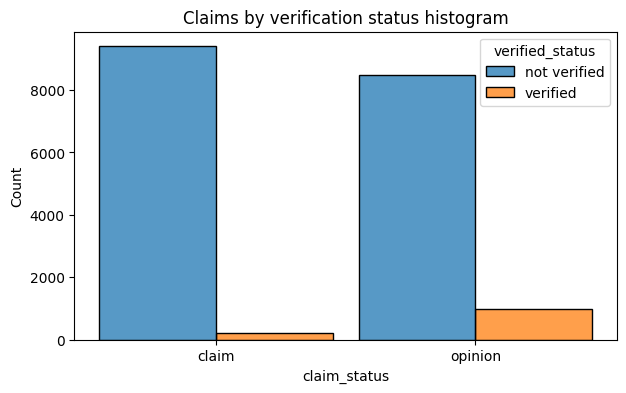

In [28]:
# Histogram of Claim Status by Verification Status
plt.figure(figsize=(7,4))
sns.histplot(data=df2_tiktok,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram');

**Comparative Analysis of Categorical Variables: 'claim_status' and 'author_ban_status'**

In [29]:
print(df2_tiktok.groupby("claim_status")[["author_ban_status"]].count())
print()
print(pd.crosstab(df2_tiktok["claim_status"], df2_tiktok["author_ban_status"]))

              author_ban_status
claim_status                   
claim                      9608
opinion                    9476

author_ban_status  active  banned  under review
claim_status                                   
claim                6566    1439          1603
opinion              8817     196           463


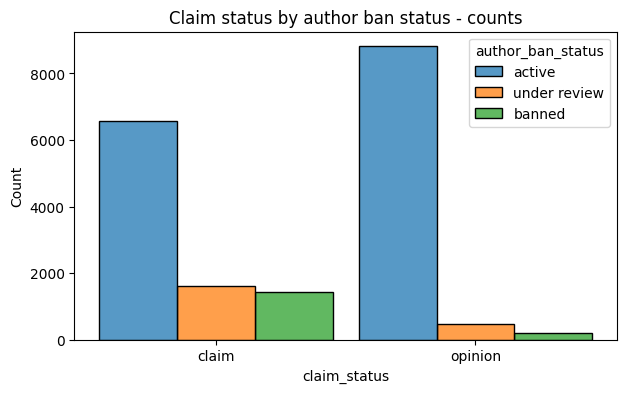

In [30]:
# Histogram of Claim Status by Author Ban Status
fig = plt.figure(figsize=(7,4))
sns.histplot(df2_tiktok, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9)
plt.title('Claim status by author ban status - counts');

**Comparative Median Analysis of Categorical Variables: 'author_ban_status'**

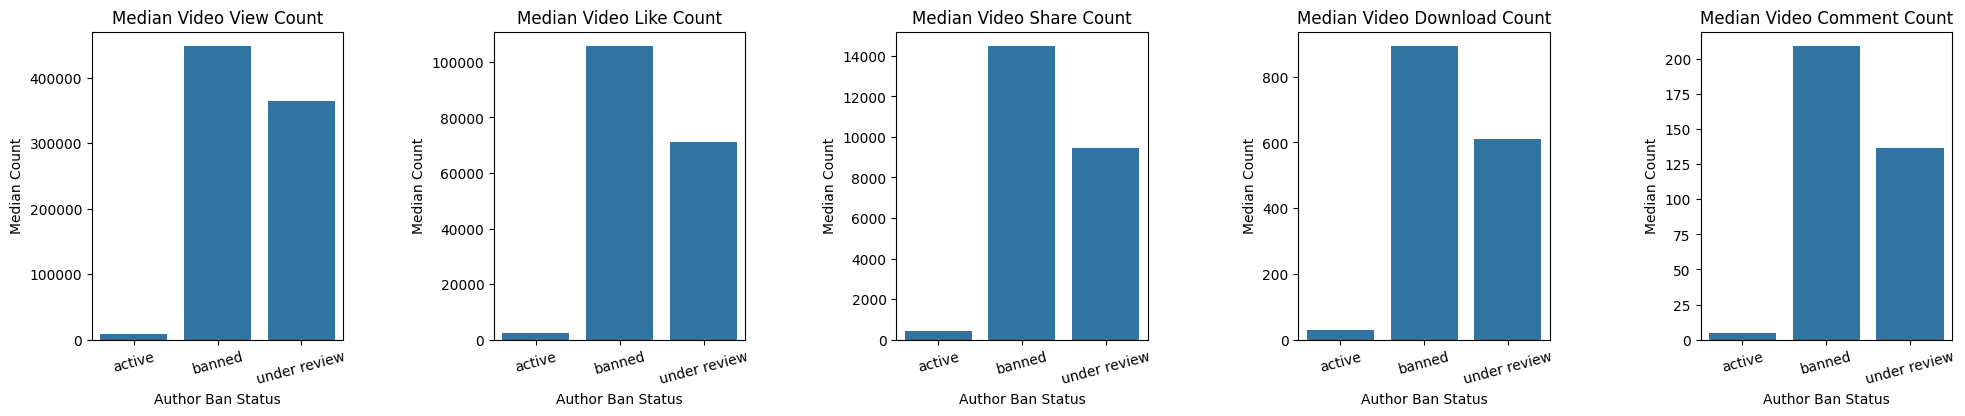

In [31]:
# Calculate the median grouped by 'author_ban_status'
ban_status_counts = df2_tiktok.groupby(['author_ban_status']).median(numeric_only=True).reset_index()

# List of continuous columns to plot
columns_to_plot = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']

# Dynamically generate bar plots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(24, 4))

for ax, col in zip(axes, columns_to_plot):
    sns.barplot(data=ban_status_counts,
                x='author_ban_status',
                y=col,
                ax=ax)
    ax.set_title(f'Median {col.replace("_", " ").title()}', fontsize=12)
    ax.set_xlabel('Author Ban Status', fontsize=10)
    ax.set_ylabel('Median Count', fontsize=10)
    ax.tick_params(axis='x', rotation=15)

plt.subplots_adjust(wspace=0.6)
plt.show()


**Comparative Median Analysis of Categorical Variables: 'verified_status'**

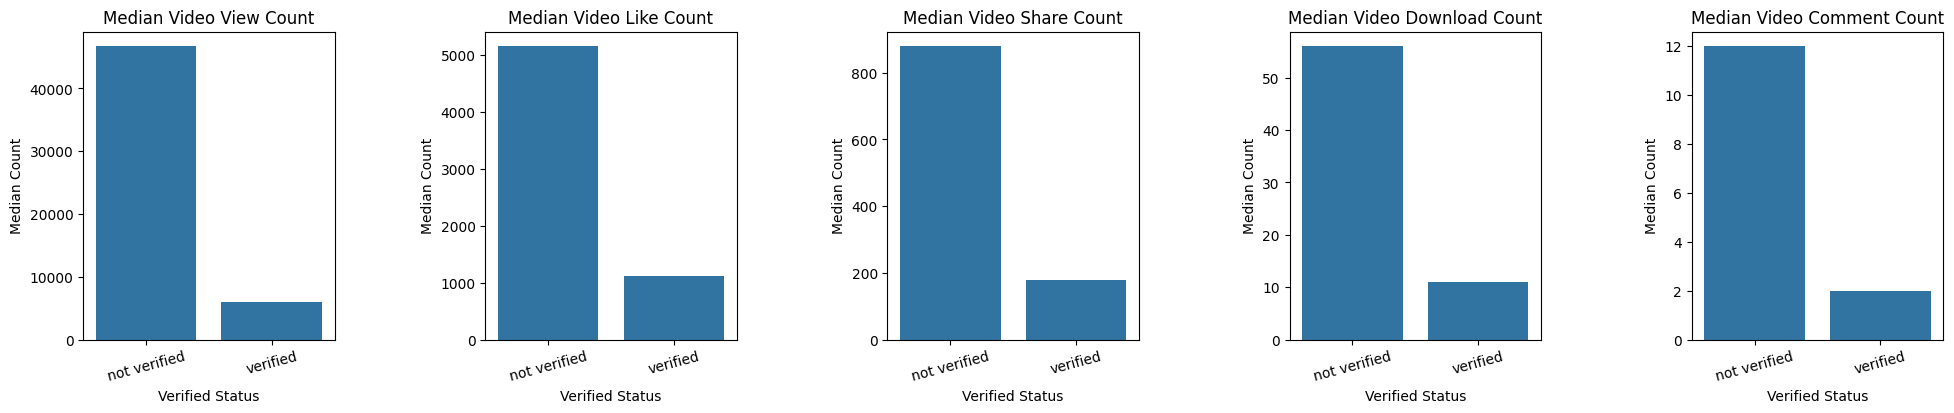

In [32]:
# Calculate the median grouped by 'verified_status'
ban_status_counts = df2_tiktok.groupby(['verified_status']).median(numeric_only=True).reset_index()

# List of continuous variables to plot
columns_to_plot = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']

# Dynamically generate bar plots for each variable
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(24, 4))

for ax, col in zip(axes, columns_to_plot):
    sns.barplot(data=ban_status_counts,
                x='verified_status',
                y=col,
                ax=ax)
    ax.set_title(f'Median {col.replace("_", " ").title()}', fontsize=12)
    ax.set_xlabel('Verified Status', fontsize=10)
    ax.set_ylabel('Median Count', fontsize=10)
    ax.tick_params(axis='x', rotation=15)

plt.subplots_adjust(wspace=0.6)
plt.show()


**Conclusions:**
- **Prevalence of Non-Verified Users and Banned Authors:** 'Non-verified' users consistently prevalence all engagement metrics (views, likes, shares, downloads, and comments) compared to 'verified' users. Their content reaches broader audiences, likely due to higher volume or appeal. 'Banned' authors exhibit the highest engagement metrics among all 'author_ban_status' categories, suggesting their content attracts significant attention, possibly due to its controversial or policy-violating nature.
- **Verified Users and Active Authors Show Lower Engagement:** 'Verified' users, much like 'active' authors, show lower median metrics across all variables, indicating they produce more niche or policy-compliant content that appeals to smaller, targeted audiences. 'Active' authors have the lowest engagement metrics among all groups analyzed under 'author_ban_status'.
- **Authors Under Review Show Moderate Engagement:** Authors 'under review' show metrics that are higher than active authors but lower than banned authors.
- **Similarities Between Non-Verified Users and Banned Authors:** Both non-verified users and banned authors share a pattern of higher engagement metrics, highlighting the influence of potentially less-regulated or controversial content on overall platform activity.


## **5. Examine correlations**

This section explores the relationships between key video metrics—views, likes, shares, downloads, and comments—using a correlation matrix, pairplot, and heatmap. These visualizations highlight interaction patterns and identify metrics that drive engagement, offering insights to inform future strategies.

In [ ]:
# Create the pairplot using only the selected columns
columns_to_plot = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']

sns.pairplot(df2_tiktok[columns_to_plot]);

In [54]:
# Correlation Matrix for TikTok Metrics
df2_tiktok[['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']].corr(numeric_only=True)

,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
video_view_count,1.000000,0.804322,0.665635,0.664222,0.554172
video_like_count,0.804322,1.000000,0.825789,0.823554,0.687185
video_share_count,0.665635,0.825789,1.000000,0.679910,0.574632
video_download_count,0.664222,0.823554,0.679910,1.000000,0.832464
video_comment_count,0.554172,0.687185,0.574632,0.832464,1.000000


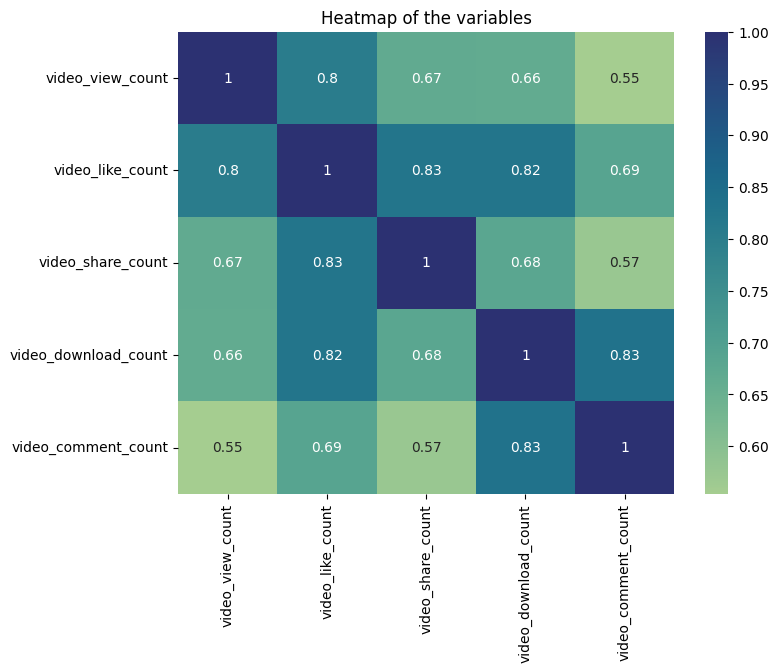

In [64]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    df2_tiktok[["video_view_count", "video_like_count", "video_share_count", "video_download_count", "video_comment_count"]].corr(numeric_only=True), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the variables")
plt.show()

**Conclusions:**
- video_view_count and video_like_count (0.80): Strong positive correlation, indicating that videos with more views tend to receive more likes.
= video_like_count and video_share_count (0.83): Very strong correlation, suggesting that videos with more likes are also more likely to be shared.
- video_download_count and video_comment_count (0.83): Strong relationship, indicating that users who download videos are also more likely to engage through comments.
- Regarding the Heatmap several metrics exhibit strong relationships (above 0.8), especially among interaction metrics such as likes, shares, downloads, and comments. However, video_comment_count has the lowest correlation (0.55 with video_view_count), indicating that comments are not as directly related to view counts.
- Predictive models can leverage highly correlated metrics such as likes, shares, and downloads to forecast video performance, optimize content strategy, and enhance engagement. These metrics, - strongly tied to user interaction, can act as reliable predictors for outcomes like virality, future engagement, or user retention. 

## **5.  CONCLUSIONS AND RECOMMENDATIONS:**

- The dataset has a low percentage of missing values (1.54%), primarily concentrated in key variables such as views, likes, and others. The removal of these rows was justified as it did not introduce biases or affect any underlying patterns in the data.
- Major variables, such as views, likes, shares, downloads, and comments, exhibit highly right-skewed distributions.
- Numerous outliers were identified across these metrics, representing videos with exceptionally high interaction levels. These outliers are significant as they reflect viral or highly popular content.
- 'Non-verified' users consistently generate higher interaction metrics (views, likes, shares, downloads, comments) compared to 'verified' users. This could be due to a higher volume of content or broader audience appeal.
- 'Banned' authors have the highest engagement metrics, possibly due to controversial or unregulated content.
- 'Verified' users and 'active' authors show lower metrics, suggesting a focus on more niche or policy-compliant content.
- There are strong positive correlations between interaction metrics:
    - Views and likes (0.80), indicating that videos with more views tend to receive more likes.
    - Likes and shares (0.83), suggesting that videos with more likes are more likely to be shared.
    - Downloads and comments (0.83), highlighting that users who download videos are also more likely to leave comments.
    - These correlations can be leveraged to build predictive models to optimize content strategy and enhance engagement.
- Identified outliers and strong correlations provide valuable insights for designing content strategies, emphasizing videos with high viral potential.
